In [258]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt


data1 = pd.read_csv('b30hz0.txt', sep = "\t", header=None)
data2 = pd.read_csv('h30hz0.txt', sep = "\t",header=None)

data1.rename(columns={0: "s1", 1: "s2", 2:"s3", 3: "s4"}, inplace=True)
data1.drop(columns=[4], inplace=True)

data2.rename(columns={0: "s1", 1: "s2", 2:"s3", 3: "s4"}, inplace=True)
data2.drop(columns=[4], inplace=True)


<Axes: >

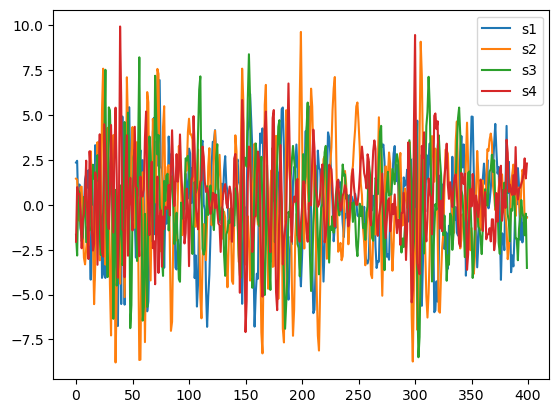

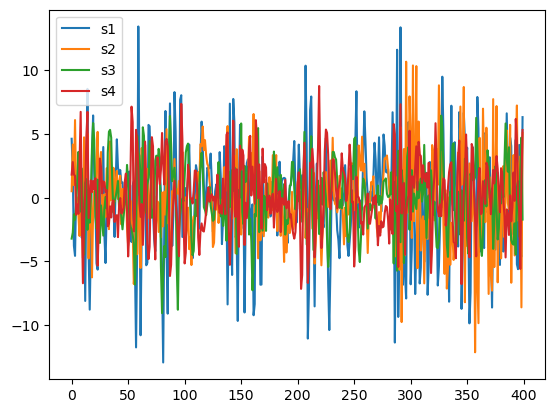

In [259]:
start_idx = 0
end_idx = 400

data1 = data1[start_idx:end_idx]
data2 = data2[start_idx:end_idx]

data1.plot()
data2.plot()


### Корреляция сигналов из набора Data1

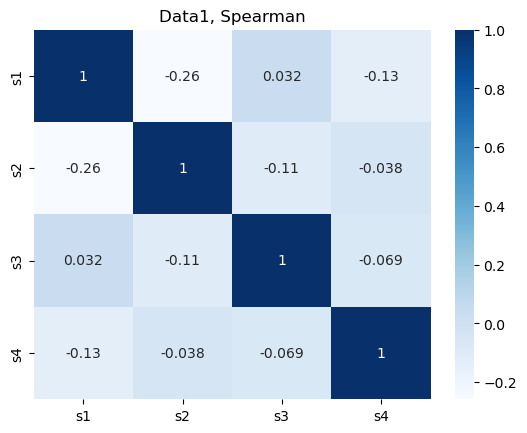

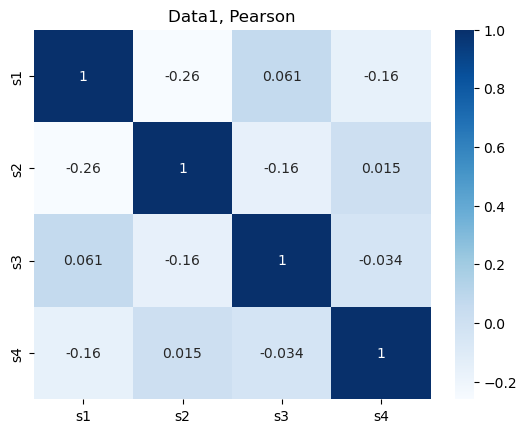

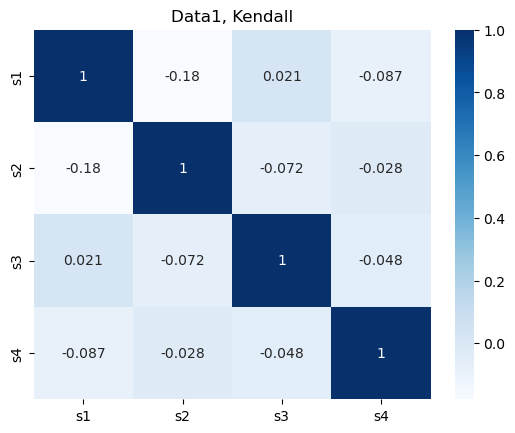

In [260]:
#Корреляция Спирмена
c = data1.corr(method="spearman")
sns.heatmap(c, annot=True, cmap='Blues')
plt.title('Data1, Spearman')
plt.show()
#Корреляция Пирсона
c = data1.corr(method="pearson")
sns.heatmap(c, annot=True, cmap='Blues')
plt.title('Data1, Pearson')
plt.show()
#Корреляция Кенделла
c = data1.corr(method="kendall")
sns.heatmap(c, annot=True, cmap='Blues')
plt.title('Data1, Kendall')
plt.show()

### Корреляция между сигналоми наборов Data1 и Data2

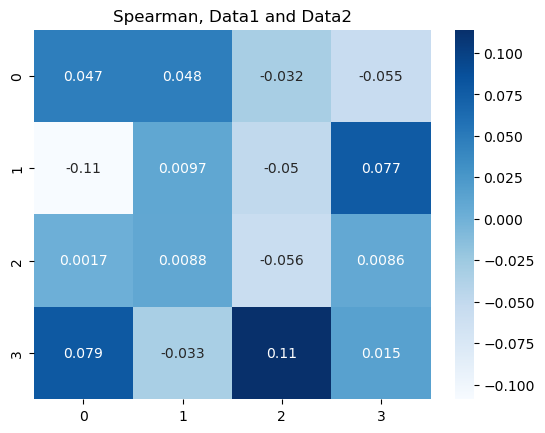

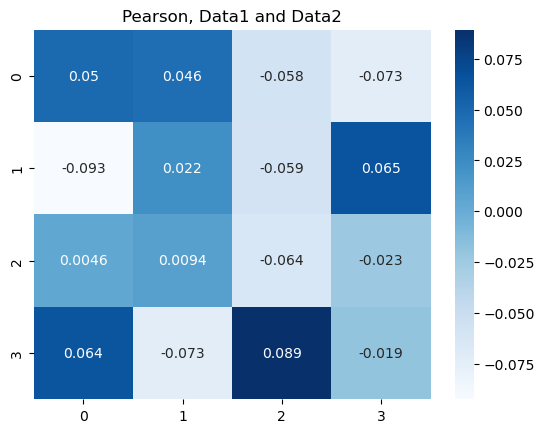

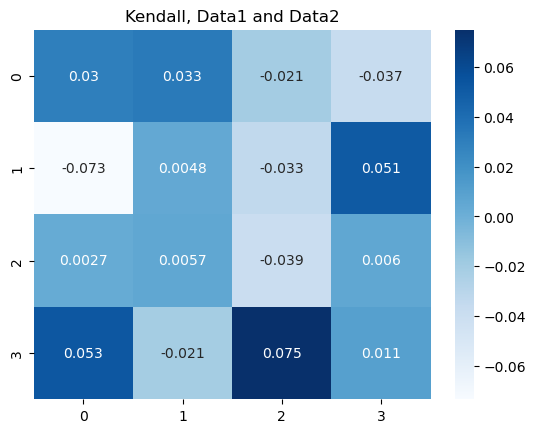

In [261]:
from scipy import stats
corr_res =  np.zeros([4,4])
#spearman
for i in [0,1,2,3]:
    for j in [0,1,2,3]:
        query = data2.iloc[:, [i]].to_numpy()[:,0]
        template = data1.iloc[:, [j]].to_numpy()[:,0]
        corr_res[i,j] = stats.spearmanr(query, template).statistic

sns.heatmap(corr_res, annot=True, cmap='Blues')
plt.title('Spearman, Data1 and Data2')
plt.show()

corr_res =  np.zeros([4,4])
#pearson
for i in [0,1,2,3]:
    for j in [0,1,2,3]:
        query = data2.iloc[:, [i]].to_numpy()[:,0]
        template = data1.iloc[:, [j]].to_numpy()[:,0]
        corr_res[i,j] = stats.pearsonr(query, template).statistic
sns.heatmap(corr_res, annot=True, cmap='Blues')
plt.title('Pearson, Data1 and Data2')
plt.show()

corr_res =  np.zeros([4,4])
#pearson
for i in [0,1,2,3]:
    for j in [0,1,2,3]:
        query = data2.iloc[:, [i]].to_numpy()[:,0]
        template = data1.iloc[:, [j]].to_numpy()[:,0]
        corr_res[i,j] = stats.kendalltau(query, template).statistic
sns.heatmap(corr_res, annot=True, cmap='Blues')
plt.title('Kendall, Data1 and Data2')
plt.show()



### Dynamic time warpring - пример

<Axes: xlabel='Index', ylabel='Query value'>

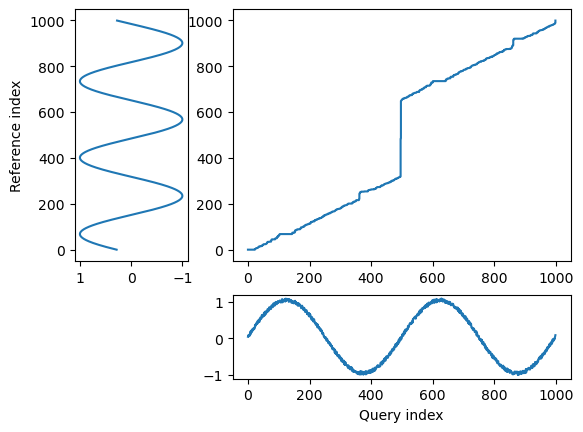

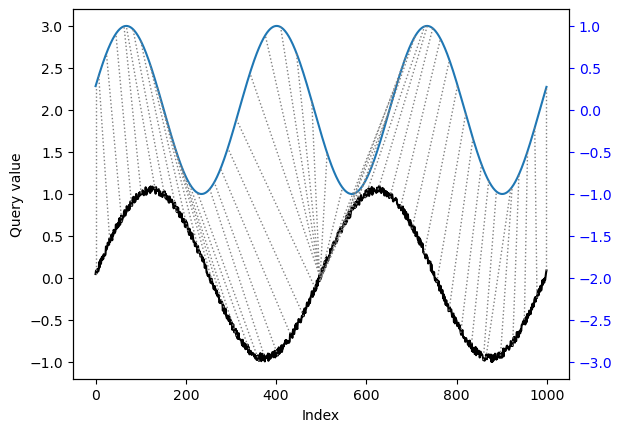

In [262]:
import numpy as np
## A noisy sine wave as query
idx = np.linspace(0,6.28,num=1000)
query = np.sin(idx*2) + np.random.uniform(size=1000)/10.0

## A cosine is for template; sin and cos are offset by 25 samples
template = np.cos(idx*3+5)

## Find the best match with the canonical recursion formula
from dtw import *
alignment = dtw(query, template, keep_internals=True)

## Display the warping curve, i.e. the alignment curve
alignment.plot(type="threeway")

alignment.plot(type="twoway", offset = 2)



### Расчет дистанции с помощью DTW 

In [263]:
dtw_dist_norm = alignment.normalizedDistance
dtw_dist = alignment.distance
print(dtw_dist,dtw_dist_norm)

230.28754273343299 0.1151437713667165


### DTW дистанции между сигналами набора Data1 

Text(0.5, 1.0, 'Signal DTW normalized distances, Data1')

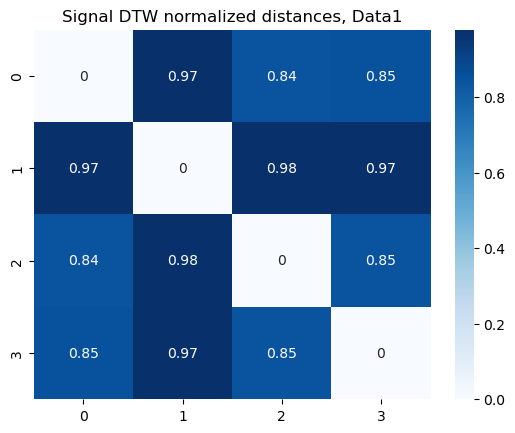

In [264]:
#Нормализованные расстояния DTW
dtw_res =   np.zeros([4,4])
for i in [0,1,2,3]:
    for j in [0,1,2,3]:
        query = data1.iloc[:, [i]].to_numpy()
        template = data1.iloc[:, [j]].to_numpy()
        alignment = dtw(query, template, keep_internals=True)
        dtw_res[i,j] = alignment.normalizedDistance
sns.heatmap(dtw_res, annot=True, cmap='Blues')
plt.title('Signal DTW normalized distances, Data1')

### DTW дистанции между сигналами Data1 и Data2

Text(0.5, 1.0, 'Signal DTW normalized distances, Data2')

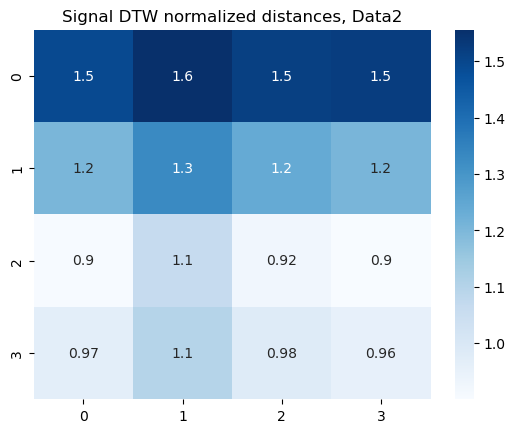

In [265]:
#Нормализованные расстояния DTW
dtw_res =   np.zeros([4,4])
for i in [0,1,2,3]:
    for j in [0,1,2,3]:
        query = data2.iloc[:, [i]].to_numpy()
        template = data1.iloc[:, [j]].to_numpy()
        alignment = dtw(query, template, keep_internals=True)
        dtw_res[i,j] = alignment.normalizedDistance
sns.heatmap(dtw_res, annot=True, cmap='Blues')
plt.title('Signal DTW normalized distances, Data2')

### Спектральная плотность мощности сигнала

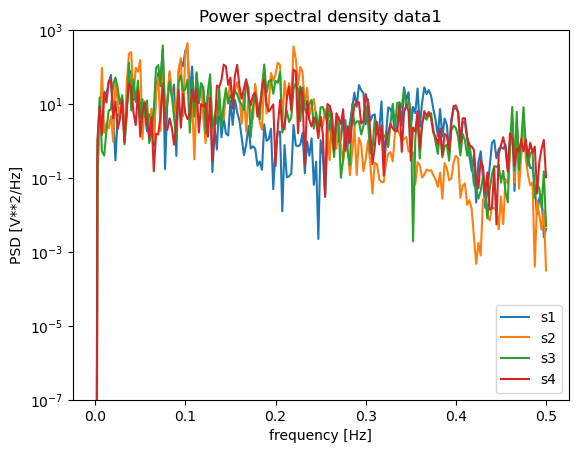

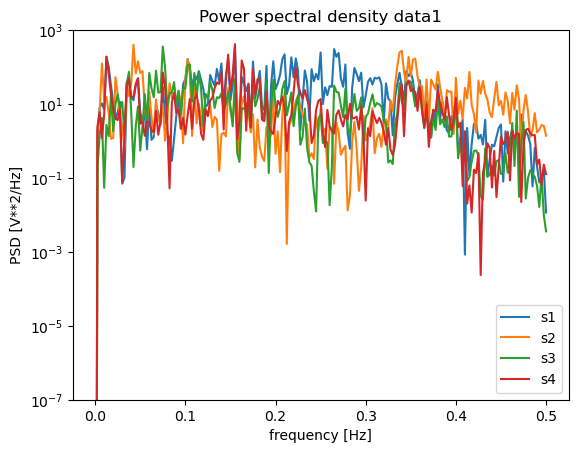

In [266]:
#Периодограмма
from scipy import signal
for i in [0,1,2,3]:
    data = data1.iloc[:, [i]].to_numpy().reshape(400)
    f, Pxx_den = signal.periodogram(data, 1)
    plt.semilogy(f, Pxx_den)
    plt.ylim([1e-7, 1e3])
    plt.xlabel('frequency [Hz]')
    plt.ylabel('PSD [V**2/Hz]')
    plt.legend(['s1', 's2', 's3','s4'])
    plt.title('Power spectral density data1' )
plt.show()

from scipy import signal
for i in [0,1,2,3]:
    data = data2.iloc[:, [i]].to_numpy().reshape(400)
    f, Pxx_den = signal.periodogram(data, 1)
    plt.semilogy(f, Pxx_den)
    plt.ylim([1e-7, 1e3])
    plt.xlabel('frequency [Hz]')
    plt.ylabel('PSD [V**2/Hz]')
    plt.legend(['s1', 's2', 's3','s4'])
    plt.title('Power spectral density data1' )
plt.show()

### Декомпозиция сигнала

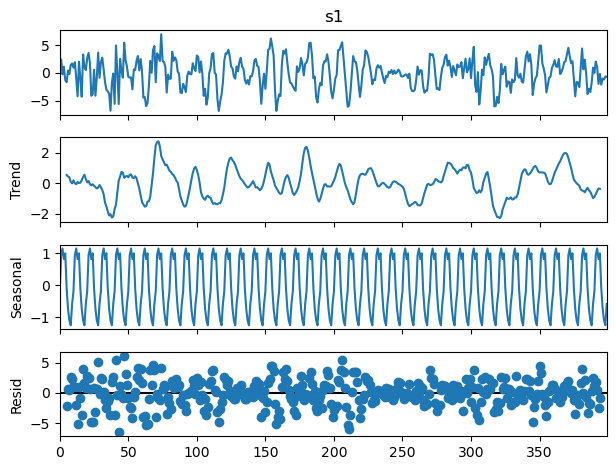

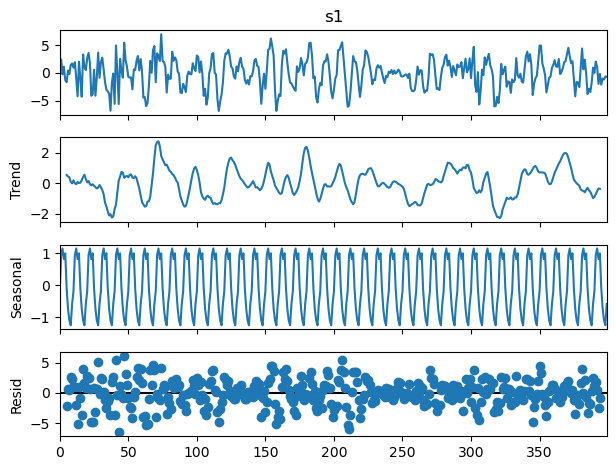

In [267]:
from statsmodels.tsa.seasonal import seasonal_decompose

seasonal_decompose(data1.s1, model='additive',period=10).plot()


# Задание
Сравнить временные ряды (варианты по методам и наборам данных) с эталонным сигналом и идентифицировать состояние (ЭКГ, работа мотора автомобиля,
идентификация состояния оборудования). 
* Взять не менее 100 значений
* Посчитать для всех сочетаний значения коэффициентов корреляции (Пирсона, Спирмена, Кендала) и сделать соответствующие выводы. 
* Посчитать значение DTW для всех сочетаний, сравнить со значениями коэффициентов корреляции, сделать выводы. 
* Посчитать спектральную плотность сигнала. Разложить временные ряды на составляющие.
### Данные для примера
* h… - нормативная работа подшипника (сигналы с четырех датчиков вибрации)
* b… - не нормативная работа подшипника (сигналы с четырех датчиков вибрации)